# 三角関数の多項式近似

## 基準となる曲線

$f(x) = 0.5 + 0.4*sin(2 \pi x) + \epsilon = h(x) + \epsilon$

$\epsilon$にガウシアンノイズを入れ、ノイズが乗った入力データを作る


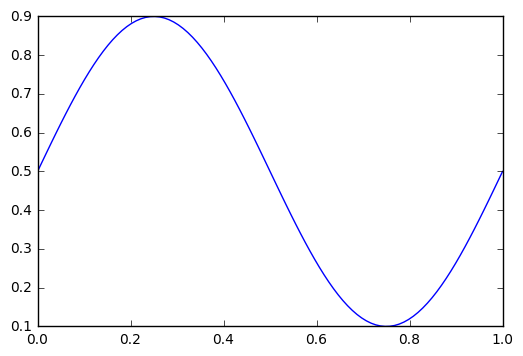

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import *
import scipy.optimize
import matplotlib.pyplot as plt
import math

x = np.linspace(0, 1, 100)
y  = 0.5 + 0.4 * np.sin(2 * x * math.pi)
plt.plot(x, y)

## 入力データの作り方
等間隔に11個を選び、平均0, 分散0.05の正規分布ノイズを加える。Pythonのnormal関数を使う。教科書に習い3回ノイズをのせる。

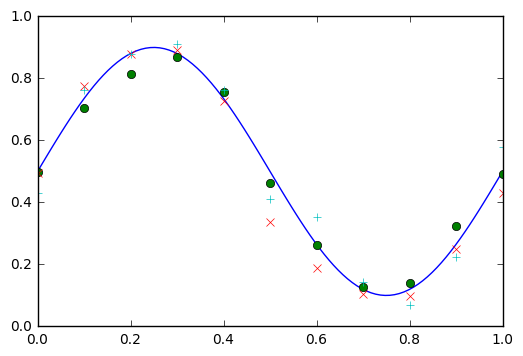

In [2]:
plot_num = 11
x_noise = np.linspace(0, 1, plot_num)
y_noise_1  = 0.5 + 0.4 * np.sin(2 * x_noise * math.pi) + normal(0,0.05, plot_num) # 平均0, 分散0.05の正規分布を加える 
y_noise_2  = 0.5 + 0.4 * np.sin(2 * x_noise * math.pi) + normal(0,0.05, plot_num)
y_noise_3  = 0.5 + 0.4 * np.sin(2 * x_noise * math.pi) + normal(0,0.05, plot_num)

#plot
plt.plot(x, y)
plt.plot(x_noise, y_noise_1, 'o')
plt.plot(x_noise, y_noise_2, 'x')
plt.plot(x_noise, y_noise_3, '+')

## 三角関数で近似する


### データの結合
３つのノイズデータを一つにまとめる

In [3]:
# データの結合
x_noise_all = np.concatenate((x_noise, x_noise, x_noise))
y_noise_all = np.concatenate((y_noise_1, y_noise_2, y_noise_3))

### 近似する関数の定義

In [4]:
def fun3(x, a, b, c):
    """a*sin(x)^2 + b*sin(x) + c"""
    r = 2 * x * math.pi
    return a * (np.sin(r)**2) + b * np.sin(r) + c


### フィッティング

0.03 * sin(x)^2 + 0.40 sin(x) + 0.48


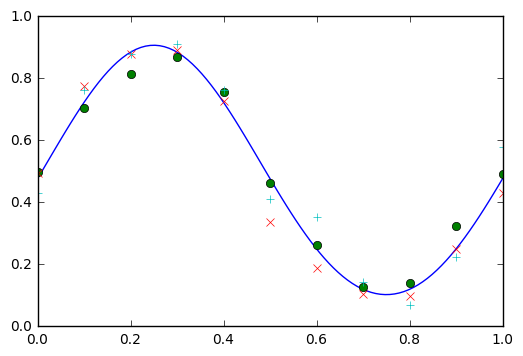

In [5]:
parameter_initial = np.array([0.0, 0.0, 0.0]) #a, b, c
paramater_optimal, covariance  = scipy.optimize.curve_fit(fun3, x_noise_all, y_noise_all, p0=parameter_initial)

# fun3(x, a, b, c)
a, b, c = paramater_optimal[0], paramater_optimal[1], paramater_optimal[2]
y_fit = fun3(x, a, b, c)

#plot
plt.plot(x, y_fit)
plt.plot(x_noise, y_noise_1, 'o')
plt.plot(x_noise, y_noise_2, 'x')
plt.plot(x_noise, y_noise_3, '+')

print("%0.2f * sin(x)^2 + %0.2f sin(x) + %0.2f" % (a, b, c))

### 10次の近似でオーバフィッティング

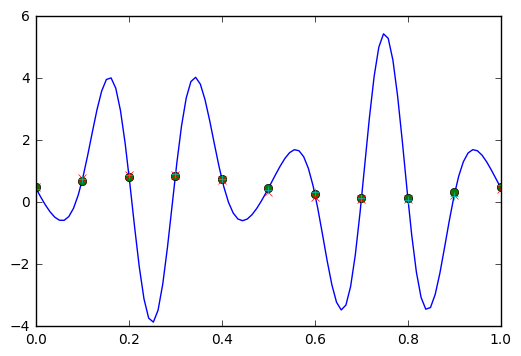

In [6]:
def fun10(x, a, b, c, d, e, f, g, h, i, j):
    r = 2 * x * math.pi
    return a * (np.sin(r)**9) + b * (np.sin(r)**8) + c * (np.sin(r)**7) + d * (np.sin(r)**6) + e * (np.sin(r)**5) +  f * (np.sin(r)**4) + g * (np.sin(r)**3) + h * (np.sin(r)**2) + i * np.sin(r) + j

parameter_initial_10 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]) 
paramater_optimal, covariance  = scipy.optimize.curve_fit(fun10, x_noise_all, y_noise_all, p0=parameter_initial_10)

a, b, c, d, e = paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3], paramater_optimal[4]
f, g, h, i, j = paramater_optimal[5], paramater_optimal[6], paramater_optimal[7], paramater_optimal[8], paramater_optimal[9]

y_fit = fun10(x, a, b, c, d, e, f, g, h, i, j)

#plot
plt.plot(x, y_fit)
plt.plot(x_noise, y_noise_1, 'o')
plt.plot(x_noise, y_noise_2, 'x')
plt.plot(x_noise, y_noise_3, '+')


['',
 "get_ipython().magic('matplotlib inline')\nimport numpy as np\nfrom numpy.random import *\nimport scipy.optimize\nimport matplotlib.pyplot as plt\nimport math\n\nx = np.linspace(0, 1, 100)\ny  = 0.5 + 0.4 * np.sin(2 * x * math.pi)\nplt.plot(x, y)",
 "plot_num = 11\nx_noise = np.linspace(0, 1, plot_num)\ny_noise_1  = 0.5 + 0.4 * np.sin(2 * x_noise * math.pi) + normal(0,0.05, plot_num) # 平均0, 分散0.05の正規分布を加える \ny_noise_2  = 0.5 + 0.4 * np.sin(2 * x_noise * math.pi) + normal(0,0.05, plot_num)\ny_noise_3  = 0.5 + 0.4 * np.sin(2 * x_noise * math.pi) + normal(0,0.05, plot_num)\n\n#plot\nplt.plot(x, y)\nplt.plot(x_noise, y_noise_1, 'o')\nplt.plot(x_noise, y_noise_2, 'x')\nplt.plot(x_noise, y_noise_3, '+')",
 '# データの結合\nx_noise_all = np.concatenate((x_noise, x_noise, x_noise))\ny_noise_all = np.concatenate((y_noise_1, y_noise_2, y_noise_3))',
 'def fun3(x, a, b, c):\n    """a*sin(x)^2 + b*sin(x) + c"""\n    r = 2 * x * math.pi\n    return a * (np.sin(r)**2) + b * np.sin(r) + c',
 'paramet